In [3]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

<h1 id="tcheading">Table Of Contents</h1>
<div id ="toc"></div>

# Auto MPG Data Set
This data set contains data from: https://archive.ics.uci.edu/ml/datasets/Auto+MPG, which is a good candidate for regression analyses. The data set contains:

1. mpg: continuous 
2. cylinders: multi-valued discrete 
3. displacement: continuous 
4. horsepower: continuous 
5. weight: continuous 
6. acceleration: continuous 
7. model year: multi-valued discrete 
8. origin: multi-valued discrete 
9. car name: string (unique for each instance)
10. car id: primary key



# Extract Data From Database

In [6]:
%matplotlib inline
from sqlalchemy import create_engine
import psycopg2
import pandas as pd
import numpy
import random
import matplotlib.pyplot as plt
import seaborn
from sklearn import metrics

dbname = 'auto_mpg'
username = 'postgres'
mypassword = 'simple'
engine = create_engine('postgres://%s:%s@localhost/%s'%(username,mypassword,dbname))
con = psycopg2.connect(database = dbname, user = username,host='/var/run/postgresql',password=mypassword)

query = '''
SELECT *
FROM auto_mpg
'''
auto_mpg_df = pd.read_sql_query(query,con)

## Visualize the table

In [7]:
auto_mpg_df

,car_id,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,0,18,8,307,130,3504,12.0,70,1,"""chevrolet chevelle malibu"""
1,1,15,8,350,165,3693,11.5,70,1,"""buick skylark 320"""
2,2,18,8,318,150,3436,11.0,70,1,"""plymouth satellite"""
3,3,16,8,304,150,3433,12.0,70,1,"""amc rebel sst"""
4,4,17,8,302,140,3449,10.5,70,1,"""ford torino"""
5,5,15,8,429,198,4341,10.0,70,1,"""ford galaxie 500"""
6,6,14,8,454,220,4354,9.0,70,1,"""chevrolet impala"""
7,7,14,8,440,215,4312,8.5,70,1,"""plymouth fury iii"""
8,8,14,8,455,225,4425,10.0,70,1,"""pontiac catalina"""
9,9,15,8,390,190,3850,8.5,70,1,"""amc ambassador dpl"""


# Data Exploration

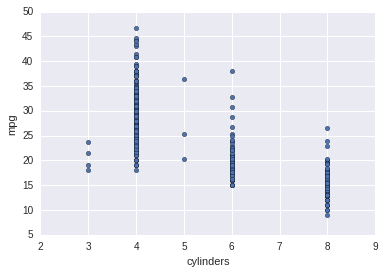

In [12]:
auto_mpg_df.plot(x='cylinders',y='mpg',kind='scatter')

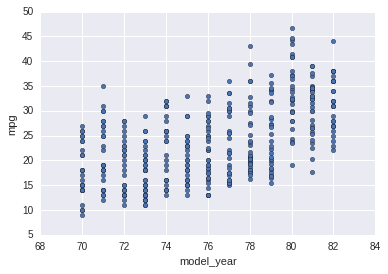

In [13]:
auto_mpg_df.plot(x='model_year',y='mpg',kind='scatter')

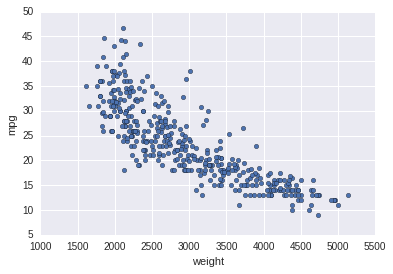

In [14]:
auto_mpg_df.plot('weight','mpg',kind='scatter')

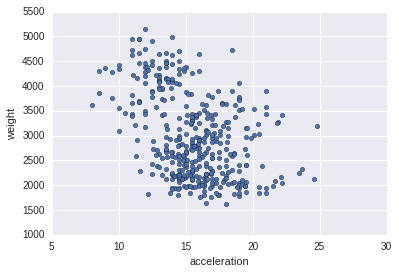

In [15]:
auto_mpg_df.plot(x='acceleration',y='weight',kind='scatter')

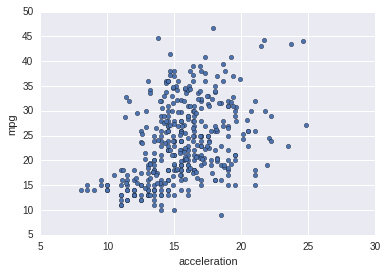

In [18]:
auto_mpg_df.plot(x='acceleration',y='mpg',kind='scatter')

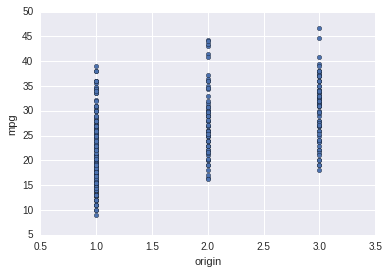

In [19]:
auto_mpg_df.plot(x='origin',y='mpg',kind='scatter')

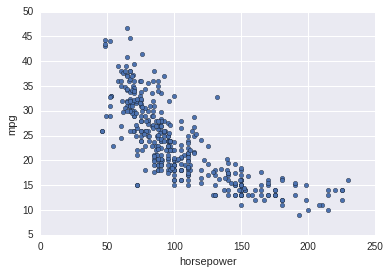

In [23]:
auto_mpg_df.plot(x='horsepower',y='mpg',kind='scatter')

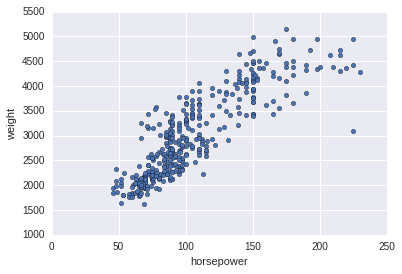

In [24]:
auto_mpg_df.plot(x='horsepower',y='weight',kind='scatter')

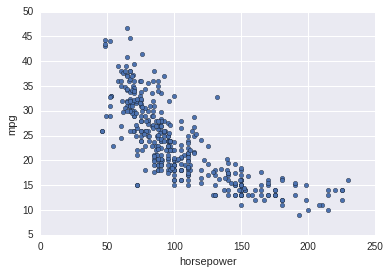

In [25]:
auto_mpg_df.plot(x='horsepower',y='mpg',kind='scatter')

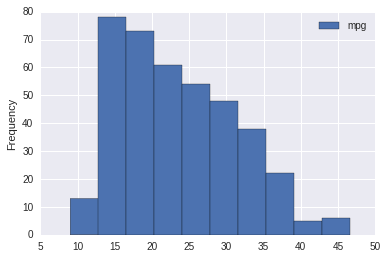

In [27]:
auto_mpg_df[['mpg']].plot(kind='hist')